In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPool2D,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [10]:
img_width,img_height=224,224
image_shape=(img_width,img_height,3)

In [11]:
train_d='chest-xray-pneumonia/chest_xray/train'
test_dir='chest-xray-pneumonia/chest_xray/test'

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1. /255)

In [15]:
train_datagenerator=train_datagen.flow_from_directory(train_d,batch_size=4,target_size=(img_width,img_height),class_mode='binary')

Found 5216 images belonging to 2 classes.


In [18]:
test_datagenerator=test_datagen.flow_from_directory(test_dir,batch_size=4,target_size=(img_width,img_height),class_mode='binary')

Found 624 images belonging to 2 classes.


In [56]:
history=model.fit_generator( train_datagenerator,
    steps_per_epoch=30,
    epochs=5,
    validation_data=test_datagenerator,
    validation_steps=10)

Epoch 1/5
30/30 [==============================] - 8s 254ms/step - loss: 0.2988 - acc: 0.8750 - val_loss: 0.7751 - val_acc: 0.7750
Epoch 2/5
30/30 [==============================] - 7s 232ms/step - loss: 0.2982 - acc: 0.8750 - val_loss: 0.6719 - val_acc: 0.7500
Epoch 3/5
30/30 [==============================] - 7s 245ms/step - loss: 0.3397 - acc: 0.8833 - val_loss: 0.8656 - val_acc: 0.5500
Epoch 4/5
30/30 [==============================] - 7s 227ms/step - loss: 0.3232 - acc: 0.8583 - val_loss: 0.2510 - val_acc: 0.9000
Epoch 5/5
30/30 [==============================] - 7s 224ms/step - loss: 0.3078 - acc: 0.8833 - val_loss: 0.5484 - val_acc: 0.7000


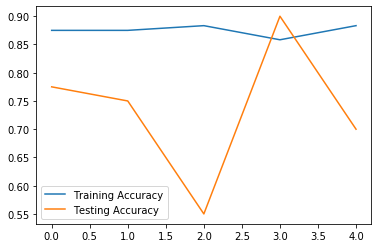

In [57]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(acc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Testing Accuracy')
plt.legend()

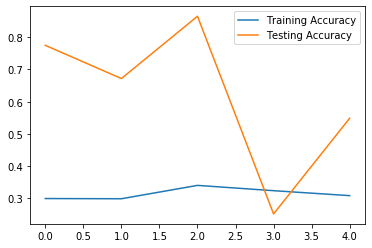

In [58]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Training Accuracy')
plt.plot(epochs,val_loss,label='Testing Accuracy')
plt.legend()

In [59]:
probablities=model.predict_generator(test_datagenerator,steps=10)

In [60]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict_generator(test_datagenerator,156)
y_pred=np.argmax(y_pred,axis=1)

print(classification_report(test_datagenerator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



In [61]:
from keras.preprocessing import image
from os import listdir
from os.path import isfile,join
mypath="chest-xray-pneumonia/chest_xray/test/"
onlyfiles=[f for f in listdir(mypath) if isfile(join(mypath,f))]
for file in listdir(mypath):
    img=image.load_img(mypath+file,target_size=(img_width,img_height))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    classes=model.predict_classes(images,batch_size=10)
    if classes[0]==0:
        print(file," : PNEUMONIA")
    elif classes[0]==1:
        print(file," : NOT PNEUMONIA")

PermissionError: [Errno 13] Permission denied: 'chest-xray-pneumonia/chest_xray/test/NORMAL'

In [62]:
help('keras.datasets')

Help on package keras.datasets in keras:

NAME
    keras.datasets

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...

FILE
    c:\users\sri hari\anaconda3\lib\site-packages\keras\datasets\__init__.py




In [63]:
from keras.datasets import mnist

In [66]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 90s 8us/step


In [69]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [70]:
from keras.utils import to_categorical

In [71]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [72]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

 2572288/26421880 [=>............................] - ETA: 2:19

KeyboardInterrupt: 